## Import the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Bankchurner.csv')

## Quick Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df = df.drop('customer_id', axis=1)

## Make an Numeric Only Dataframe

In [5]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

## Check for Outliers

In [6]:
def detect_outliers_by_row(df, threshold=3):
    row_mean = df.mean(axis=1)
    row_std = df.std(axis=1)
    
    z_scores = (df.sub(row_mean, axis=0)).div(row_std, axis=0)
    
    outliers_mask = (np.abs(z_scores) > threshold).any(axis=1)
    
    return df[outliers_mask]


outliers_df = detect_outliers_by_row(numeric_df)

In [7]:
outliers_df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [8]:
# Apparently no Outliers

In [9]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Normalize for Heatmap

In [10]:
scaler = MinMaxScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

In [11]:
normalized_df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


## Check for Correlations

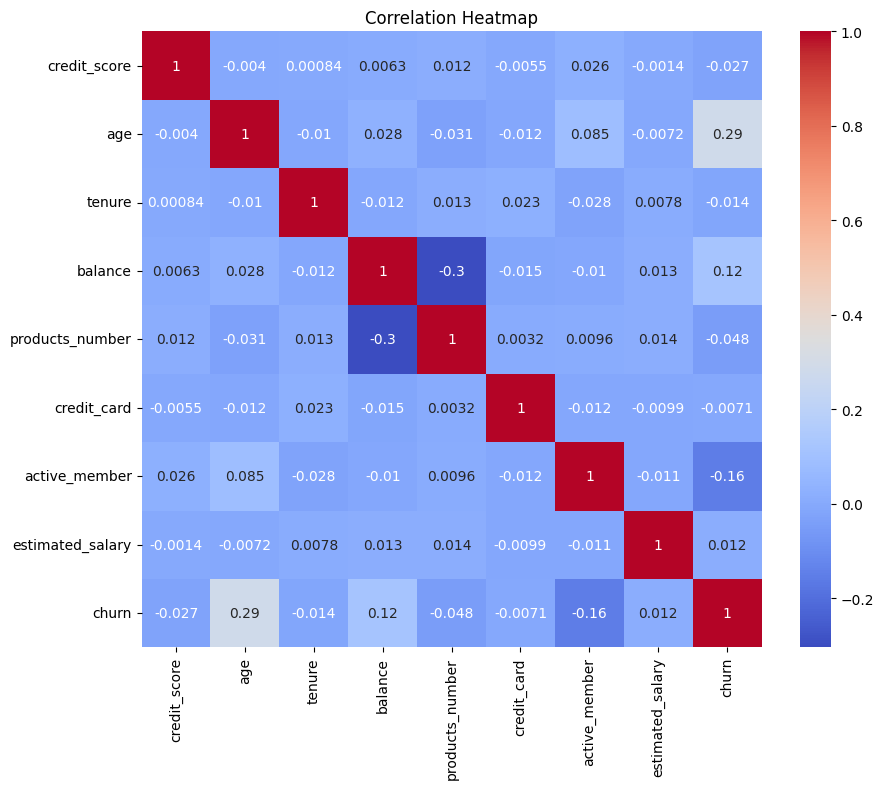

In [12]:
correlation_matrix = normalized_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
#Given minor correlations, we won't use plots and rely on algorithms to identify patterns better.

## Start Building the Model 

In [14]:
df = df.drop(['active_member'], axis=1)

In [15]:
X = df.drop(['churn'], axis=1)  # Features
Y = df.churn.values  # Target

In [16]:
X = pd.get_dummies(X, columns=['country', 'gender'], drop_first=True)
X = X.astype(int)

In [17]:
X.describe()

,credit_score,age,tenure,balance,products_number,credit_card,estimated_salary,country_Germany,country_Spain,gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.571500,1.530200,0.70550,100089.748400,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.185107,0.581654,0.45584,57510.491042,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,11.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,51001.750000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.000000,1.000000,1.00000,100193.500000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127643.750000,2.000000,1.00000,149387.750000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,199992.000000,1.000000,1.000000,1.000000


In [18]:
# Splitting the Data into Training and Testing samples for the Model
from sklearn.model_selection import train_test_split
#, stratify=Y
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [19]:
len(X_train)

7500

In [20]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [21]:
X_train_sc

array([[-0.74486807, -1.04416087, -0.34258886, ..., -0.58084006,
        -0.57242346,  0.91407657],
       [-2.27552373,  0.57853102,  0.00341389, ...,  1.72164433,
        -0.57242346,  0.91407657],
       [-0.28980828, -0.37599362,  0.00341389, ..., -0.58084006,
        -0.57242346, -1.09400025],
       ...,
       [ 0.54791543, -0.18508869, -0.34258886, ..., -0.58084006,
         1.74695846,  0.91407657],
       [-1.19992786, -0.08963623,  1.04142216, ...,  1.72164433,
        -0.57242346,  0.91407657],
       [ 0.19627832, -0.37599362, -1.03459437, ..., -0.58084006,
         1.74695846,  0.91407657]])

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=400, min_samples_split=8,
                                       max_depth=150)

model_rf.fit(X_train_sc, Y_train)

Y_pred_rf = model_rf.predict(X_test_sc)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_rf)

0.8604

## K-NearestNeighbors


In [23]:
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier()

model_kn.fit(X_train_sc, Y_train)

KNeighborsClassifier()

In [24]:
Y_pred = model_kn.predict(X_test_sc)

In [25]:
Y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
accuracy_score(Y_test, Y_pred)

0.8292

## Ada Boost

In [27]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=100)

model_ada.fit(X_train_sc, Y_train)

Y_pred_ada = model_ada.predict(X_test_sc)

accuracy_score(Y_test, Y_pred_ada)

0.848